# Import required librares

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser

# Code to import the data

In [60]:
station_id=5001
# Read the .csv file into a DataFrame
data = pd.read_csv(f'ELES-MAS-{station_id}-2020-2023.csv.gz', compression='gzip')
data = data[data['data_validity'] <= 32]
data.drop('measurement_location_inst_id', axis=1, inplace=True)
data['acquisition_timestamp'] = pd.to_datetime(data['acquisition_timestamp'])


# Rearrange the data
new_data = data.pivot_table(index='acquisition_timestamp', columns='parameter_type', values='value').reset_index()
new_data.set_index('acquisition_timestamp', inplace=True)
new_data.drop('WIND_DIRECTION', axis=1, inplace=True)
new_data.drop('RAIN_INTENSITY', axis=1, inplace=True)


# Fill NaN values in the row with the values of next row with non NaN values
new_data = new_data.fillna(method='bfill')


print('Shape of data', new_data.shape)

new_data.head()







C:\Users\aadit\AppData\Local\Temp\ipykernel_18268\2626233311.py:6: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['acquisition_timestamp'] = pd.to_datetime(data['acquisition_timestamp'])


Shape of data (271508, 5)


C:\Users\aadit\AppData\Local\Temp\ipykernel_18268\2626233311.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_data = new_data.fillna(method='bfill')


parameter_type,AIR_PRESSURE,AMBIENT_TEMPERATURE,RELATIVE_HUMIDITY,SOLAR_RADIATION_INTENSITY,WIND_SPEED
acquisition_timestamp,,,,,
2020-10-13 12:20:00+02:00,952.8,7.4,63.9,285.6,2.45
2020-10-13 12:25:00+02:00,952.8,7.5,62.5,262.0,2.45
2020-10-13 12:30:00+02:00,952.8,7.4,61.9,270.9,2.81
2020-10-13 12:35:00+02:00,952.8,7.5,62.2,307.4,3.28
2020-10-13 12:40:00+02:00,952.8,7.6,62.2,342.0,1.27


# Plot the Air Pressure

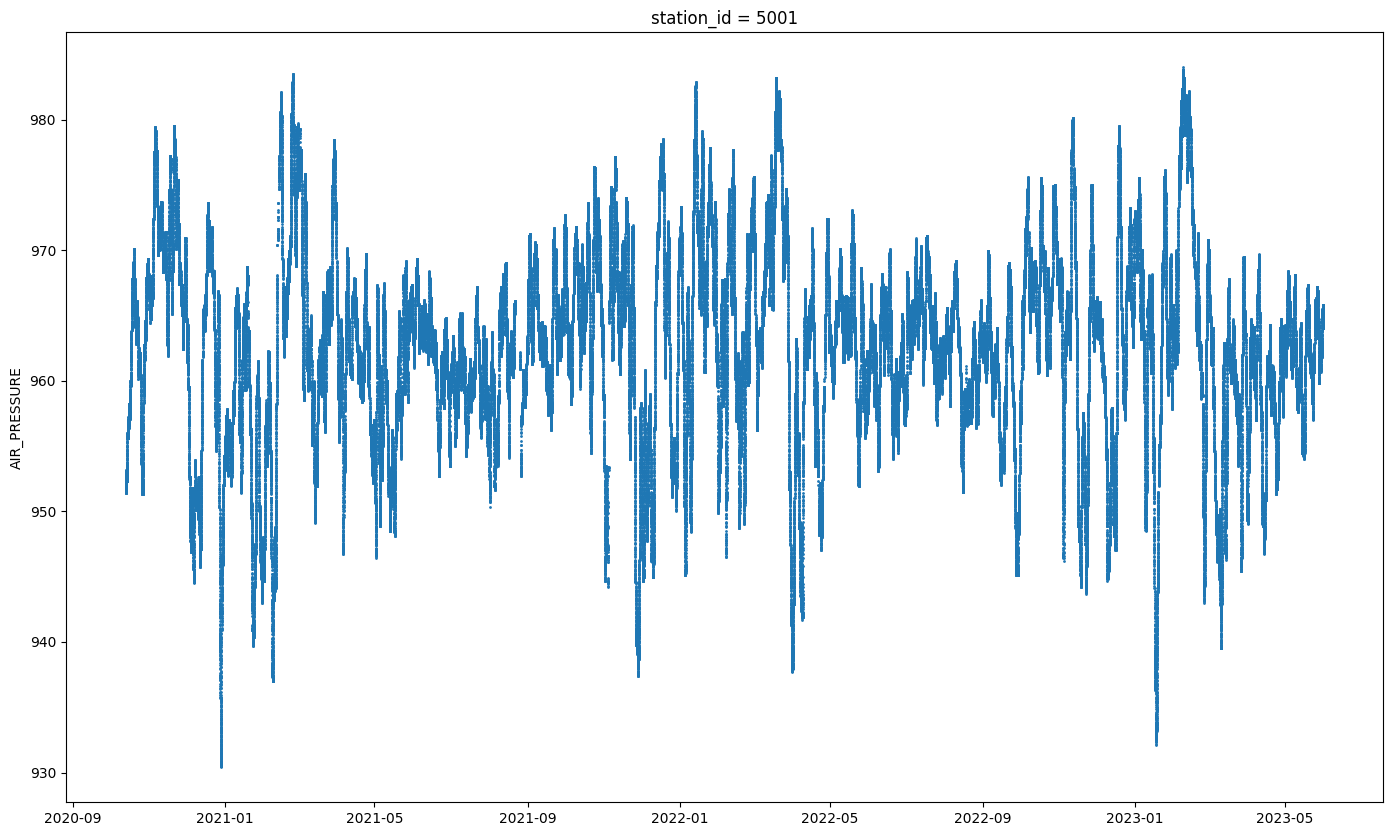

In [67]:
# Plot 'AIR_PRESSURE' column
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(new_data.index, new_data['AIR_PRESSURE'],s=1)
ax.set_ylabel('AIR_PRESSURE')  
ax.set_title(f'station_id = {station_id}')  
plt.show()

# Plot the Ambient Temperature

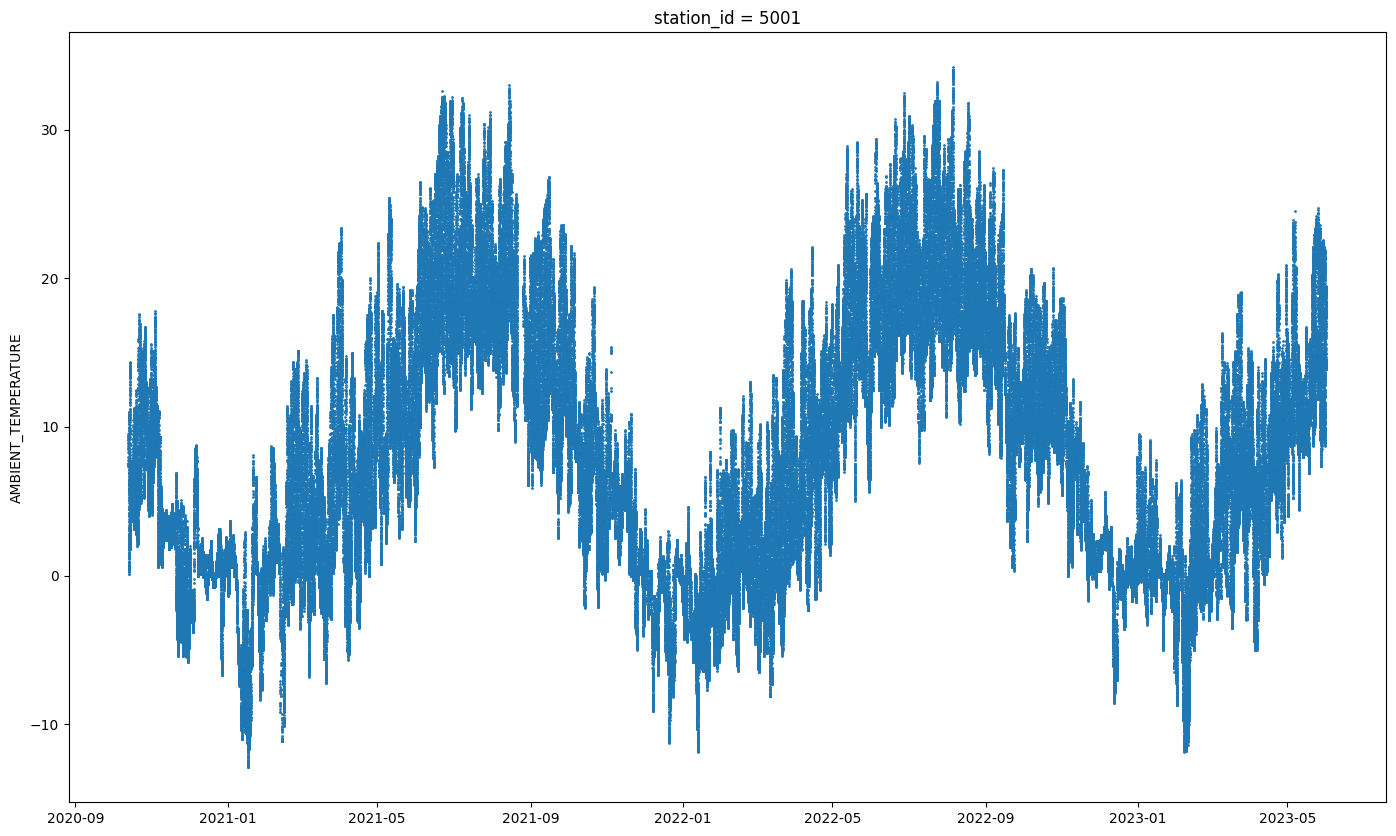

In [68]:
# Plot 'AMBIENT_TEMPERATURE' column
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(new_data.index, new_data['AMBIENT_TEMPERATURE'],s=1)
ax.set_ylabel('AMBIENT_TEMPERATURE')  
ax.set_title(f'station_id = {station_id}')  
plt.show()

# Plot the Relative Humidity

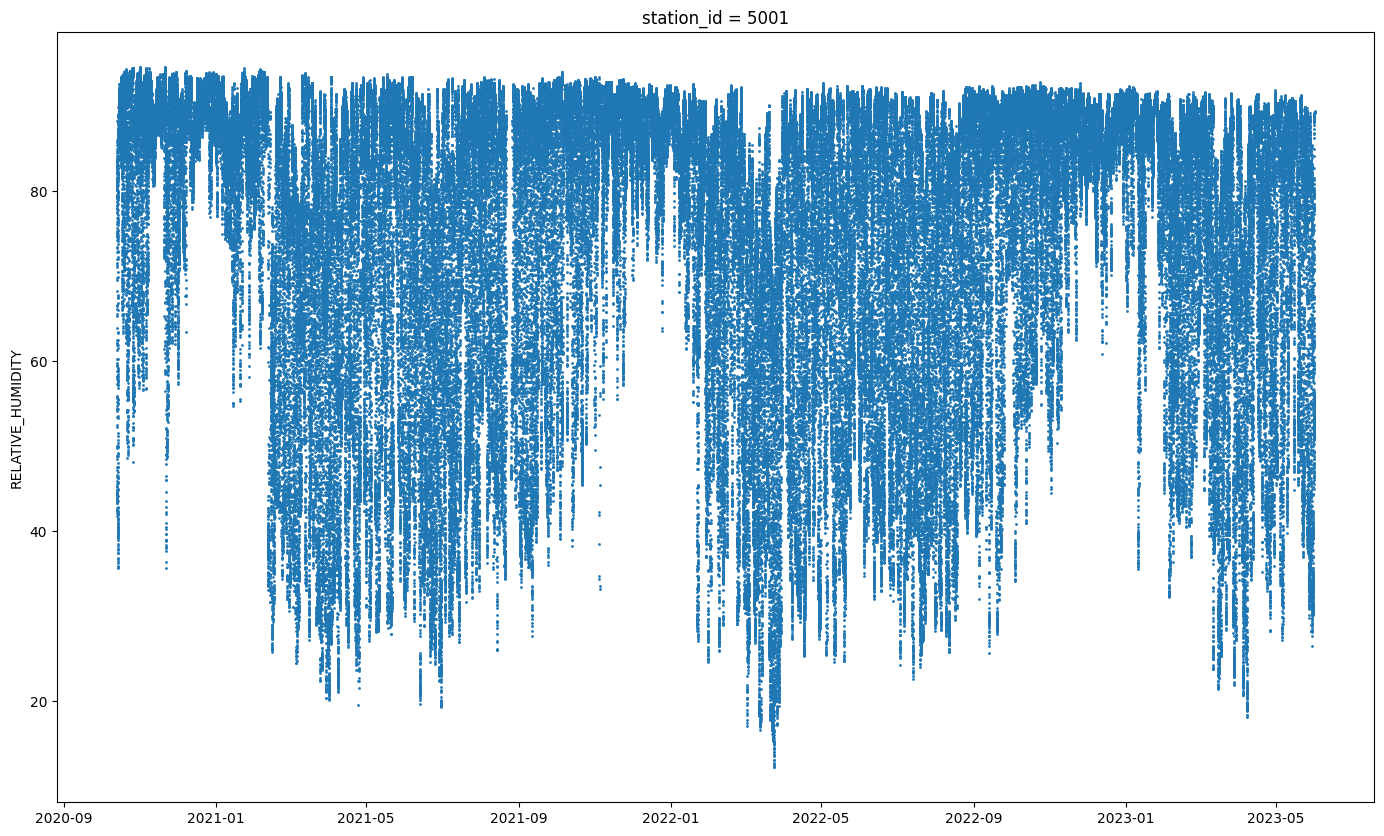

In [69]:
# Plot 'RELATIVE_HUMIDITY' column
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(new_data.index, new_data['RELATIVE_HUMIDITY'],s=1)
ax.set_ylabel('RELATIVE_HUMIDITY')  
ax.set_title(f'station_id = {station_id}')  
plt.show()

# Plot the Wind Speed

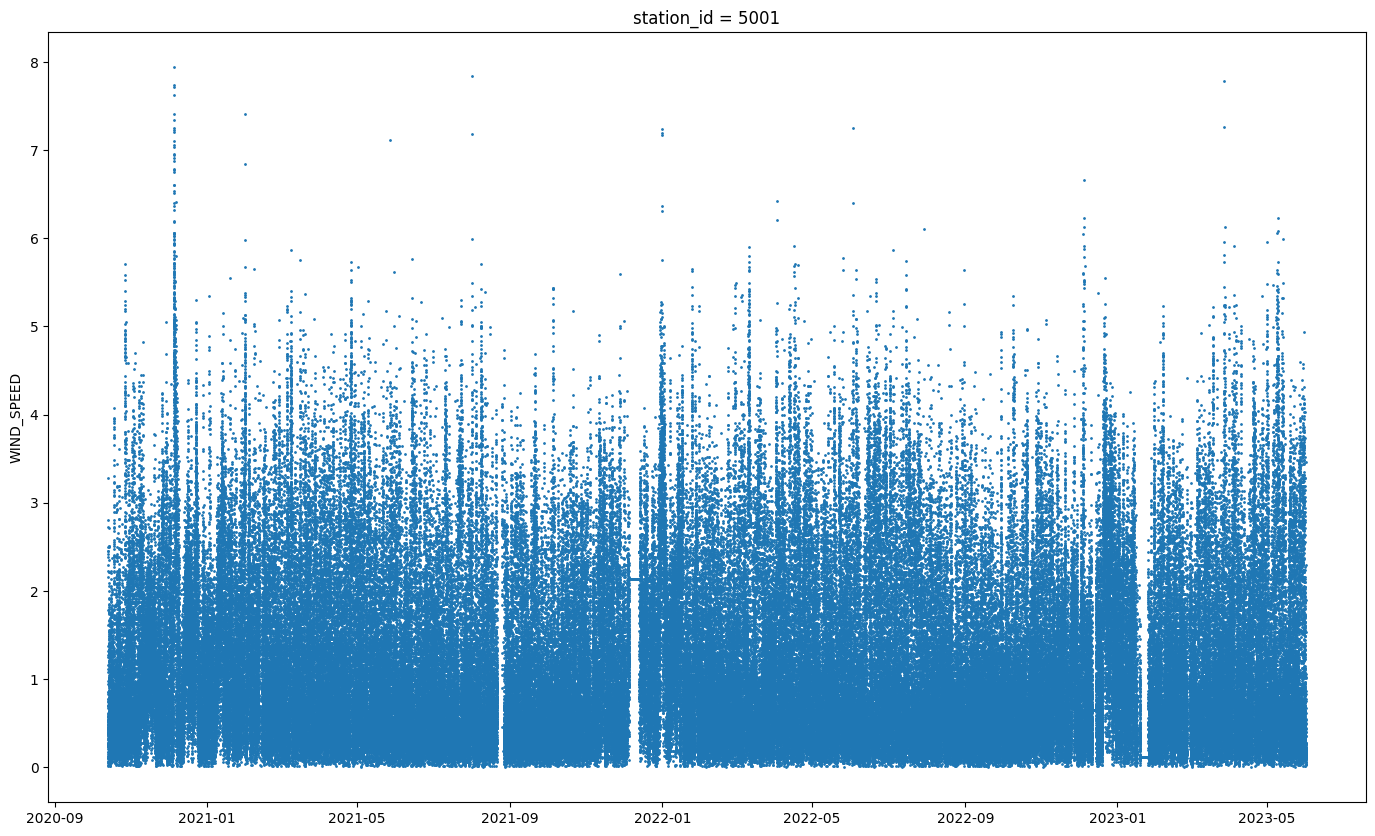

In [70]:
# Plot 'WIND_SPEED' column
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(new_data.index, new_data['WIND_SPEED'],s=1)
ax.set_ylabel('WIND_SPEED')  
ax.set_title(f'station_id = {station_id}')  
plt.show()

# Plot the Solar Radiation Intensity

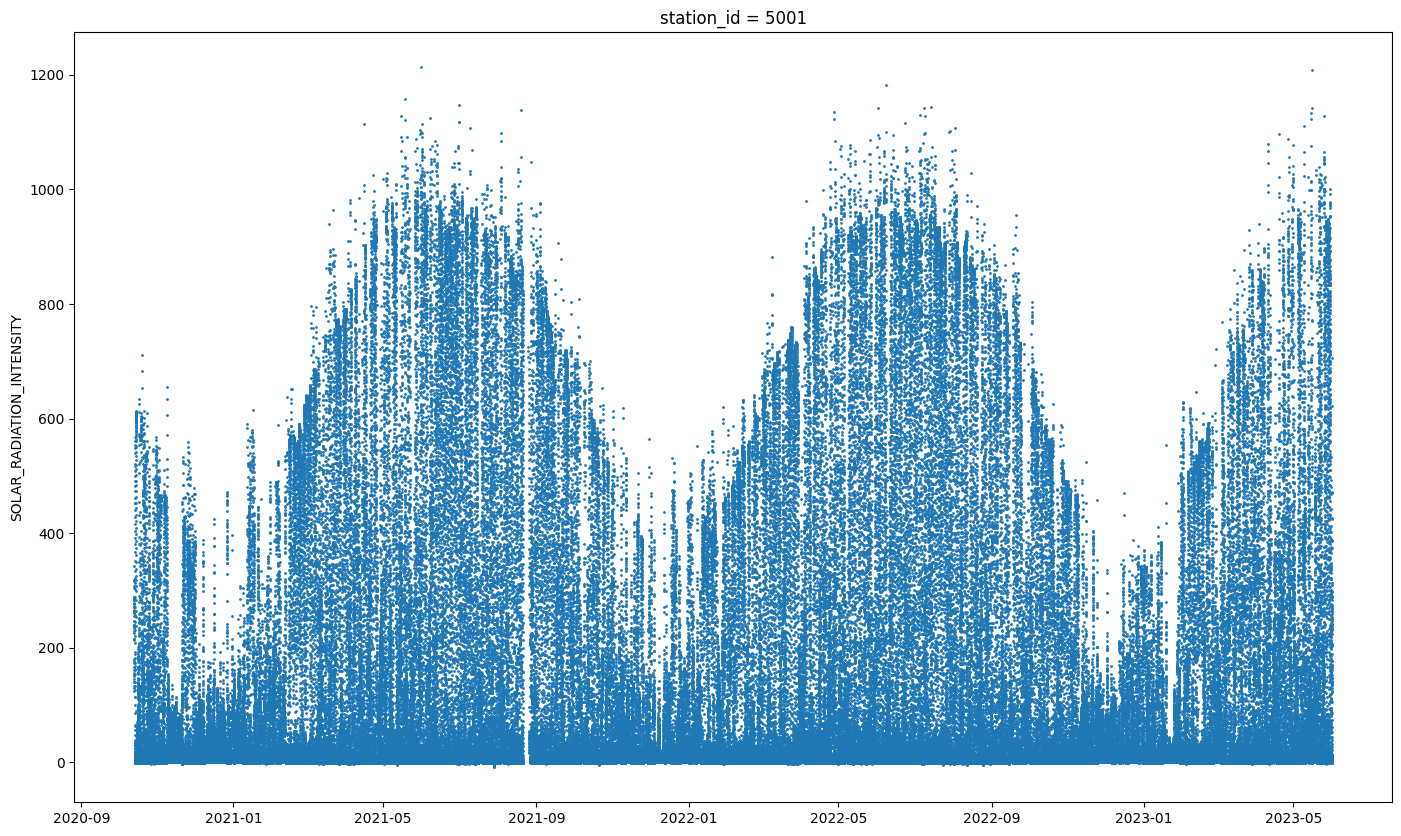

In [66]:
# Plot 'SOLAR_RADIATION_INTENSITY' column
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(new_data.index, new_data['SOLAR_RADIATION_INTENSITY'],s=1)
ax.set_ylabel('SOLAR_RADIATION_INTENSITY')  
ax.set_title(f'station_id = {station_id}')  
plt.show()

# Write the updated data to a new .csv file

In [73]:
new_data.to_csv('Weather_data_updated.csv') # File created in current working directory
print("new_data has been successfully written to 'Weather_data_updated.csv'")

new_data has been successfully written to 'Weather_data_updated.csv'


# Checking for the stationarity of the data

The following function will give out some values, where we need to focus only on p value.

If p< 0.05 ; Data is stationary 

If p>0.05; Data is not stationary

In [76]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(new_data['AIR_PRESSURE'])

1. ADF :  -10.039886031025482
2. P-Value :  1.506044405592606e-17
3. Num Of Lags :  87
4. Num Of Observations Used For ADF Regression: 271420
5. Critical Values :
	 1% :  -3.430374093146585
	 5% :  -2.8615506488674383
	 10% :  -2.566775668006592


# Creating and deciding the ARIMA Model Parameters

In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(new_data['AIR_PRESSURE'], trace=True,
suppress_warnings=True)